 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [54]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline
print(Path.cwd())

/Users/kevinwalsh/Desktop/Coding_Homework/pandas_homework


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [55]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_df = pd.read_csv(whale_returns_csv)
whale_df.set_index(pd.to_datetime(whale_df['Date'], infer_datetime_format=True), inplace=True)
whale_df.drop(columns=['Date'], inplace=True)
whale_df = whale_df.sort_index()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [56]:
# Count nulls
# YOUR CODE HERE
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [57]:
# Drop nulls
# YOUR CODE HERE
whale_df = whale_df.dropna()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [58]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_df = pd.read_csv(algo_returns_csv)
algo_df.set_index(pd.to_datetime(algo_df['Date'], infer_datetime_format=True), inplace=True)
algo_df.drop(columns=['Date'], inplace=True)
algo_df = algo_df.sort_index()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [59]:
# Count nulls
# YOUR CODE HERE
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [60]:
# Drop nulls
# YOUR CODE HERE
algo_df = algo_df.dropna()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [61]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_df = pd.read_csv(sp500_history_csv)
sp500_df.set_index(pd.to_datetime(sp500_df['Date'], infer_datetime_format=True), inplace=True)
sp500_df.drop(columns=['Date'], inplace=True)
sp500_df = sp500_df.sort_index()
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [62]:
# Check Data Types
# YOUR CODE HERE
sp500_df.dtypes

Close    object
dtype: object

In [63]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$','')
sp500_df['Close'] = sp500_df['Close'].astype('float')
# YOUR CODE HERE
sp500_df.dtypes

Close    float64
dtype: object

In [64]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_df = sp500_df.pct_change()
sp500_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [65]:
# Drop nulls
sp500_df = sp500_df.dropna()
sp500_df.head()
# YOUR CODE HERE

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [66]:
# Rename Column
# YOUR CODE HERE
sp500_df = sp500_df.rename(columns={"Close": "S&P 500"})
sp500_df.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [67]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_df = pd.concat([whale_df,algo_df,sp500_df],axis="columns",join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

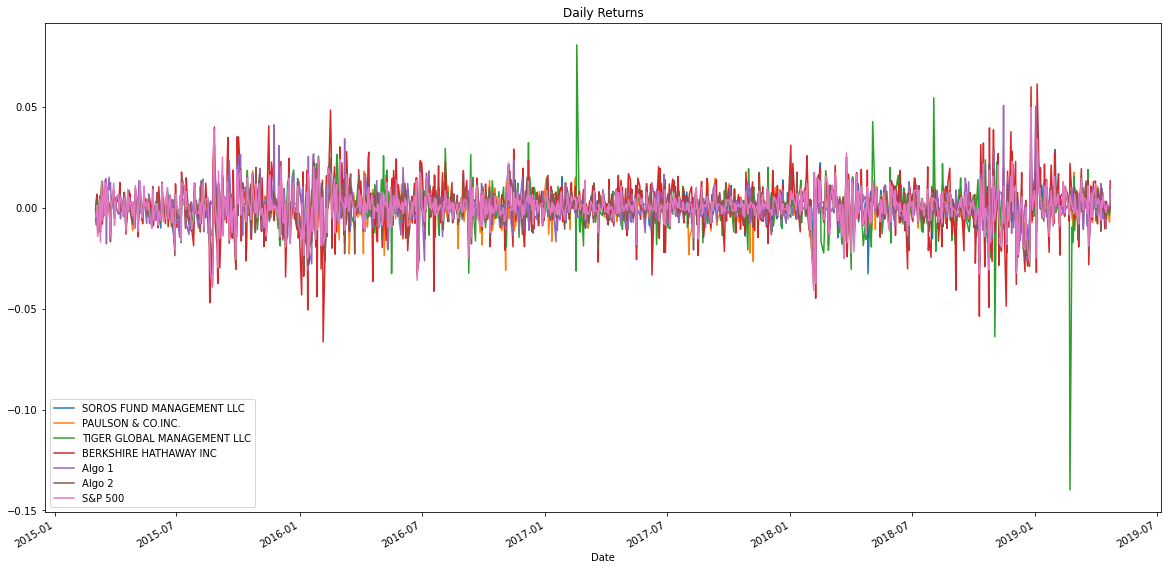

In [68]:
# Plot daily returns
# YOUR CODE HERE
combined_df.plot(figsize = (20,10),title="Daily Returns")

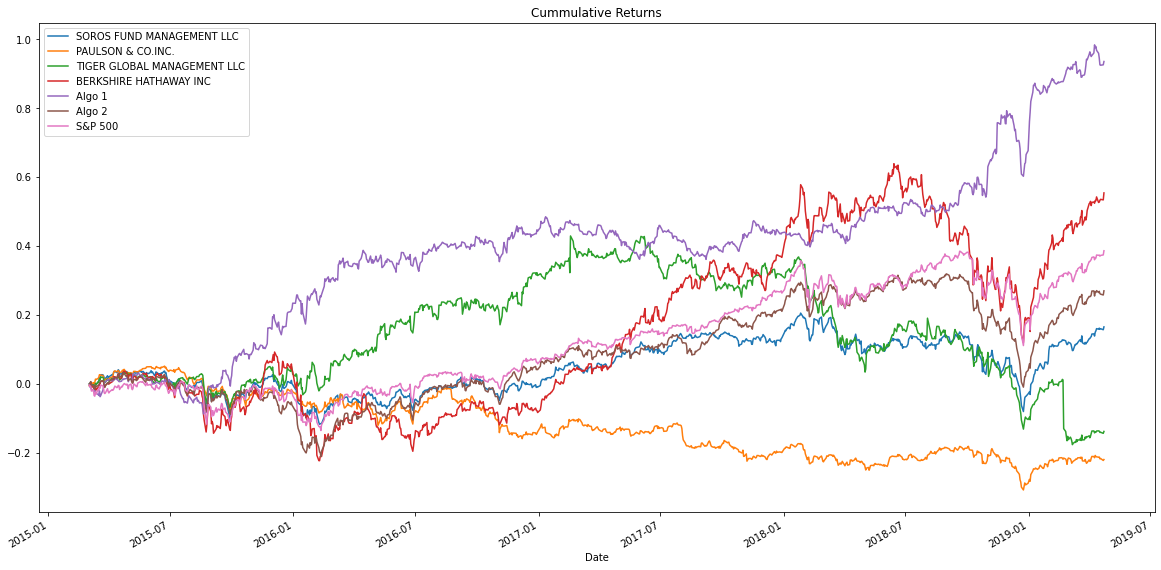

In [69]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined_df).cumprod() - 1
cumulative_returns.plot(figsize = (20,10),title="Cummulative Returns")

## Quantitative Analysis

After conducting quantitative analysis on the different portfolios, which included calculating and plotting the *cumulative* returns for each investment strategy, only two portfolios outperformed the S&P 500: Algo 1 and Berkshire Hathaway. Additionally, it should be noted that Algo 1 was the top performer and while Algo 2 did not "beat" the market, it did outpace the other portfolios under consideration. 

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

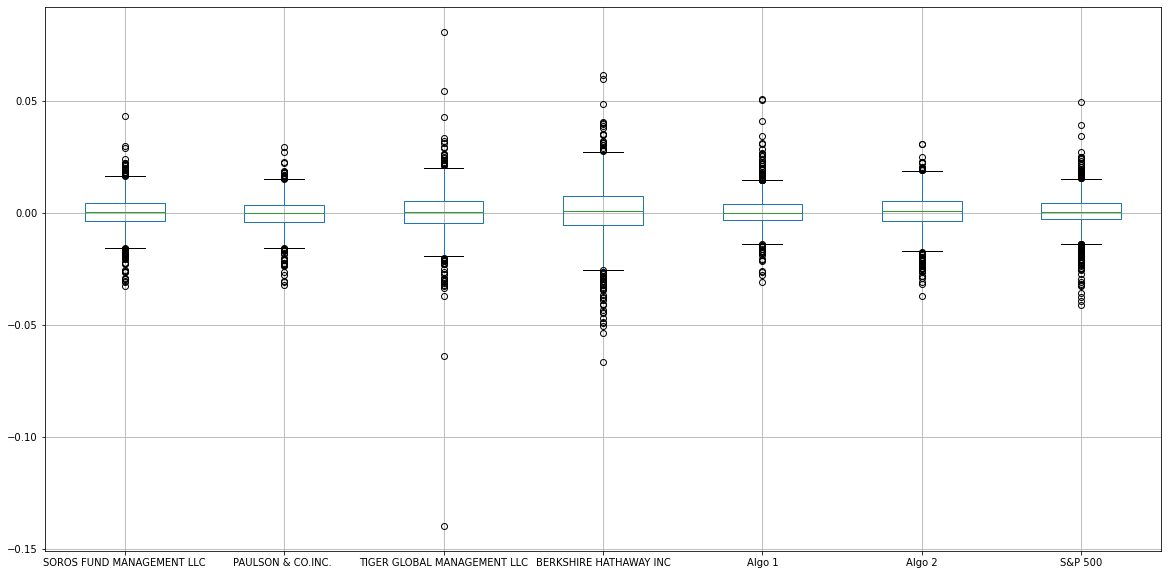

In [70]:
# Box plot to visually show risk
# YOUR CODE HERE
porfolio_risk_boxplot = combined_df.boxplot(figsize = (20,10))

## Box Plots

Any investment decision would be inadequate if it did not include a risk analysis of the different options on the table. Part of this analysis typically would include a measure of the variability of the different investment options. Box plots are helpful in accomplishing this analysis as they allow investors to visualize the distribution, central value and variability of each performance. As we can see from the graph above, Algo 2 has the smallest smallest distribution, or spread, between its maximum and minimum values, indicating that it is a relatively safe choice in comparison to the other options. 

In [71]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
volatility = combined_df.std()
volatility

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [72]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
for key, value in volatility.items():
    if value > volatility["S&P 500"]:
        print(f"{key} is more risky than S&P 500")
    elif value < volatility["S&P 500"]:
        print(f"{key} is less risky than S&P 500")
    else:
        print(f"{key} is as risky as the S&P 500")

SOROS FUND MANAGEMENT LLC is less risky than S&P 500
PAULSON & CO.INC.  is less risky than S&P 500
TIGER GLOBAL MANAGEMENT LLC is more risky than S&P 500
BERKSHIRE HATHAWAY INC is more risky than S&P 500
Algo 1 is less risky than S&P 500
Algo 2 is less risky than S&P 500
S&P 500 is as risky as the S&P 500


In [73]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
volatility_annualized = combined_df.std()*np.sqrt(252)
volatility_annualized

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

In [74]:
for key, value in volatility_annualized.items():
    if value > volatility_annualized["S&P 500"]:
        print(f"{key} is more risky than S&P 500")
    elif value < volatility_annualized["S&P 500"]:
        print(f"{key} is less risky than S&P 500")
    else:
        print(f"{key} is as risky as the S&P 500")
        

SOROS FUND MANAGEMENT LLC is less risky than S&P 500
PAULSON & CO.INC.  is less risky than S&P 500
TIGER GLOBAL MANAGEMENT LLC is more risky than S&P 500
BERKSHIRE HATHAWAY INC is more risky than S&P 500
Algo 1 is less risky than S&P 500
Algo 2 is less risky than S&P 500
S&P 500 is as risky as the S&P 500


## Standard Deviations

Another measure of risk for an investment strategy would be standard deviations, which is a measure of the amount of variation or dispersion of a set of values, which in this case would be the portfolio's daily returns. A low standard deviation indicates that the values *tend* to be close to the mean while a high standard deviation indicates that the values *tend* to spread out over a wider range. Therefore, a low standard deviation would be indicative of a less risky investment strategy when compared to a strategy with a higher standard deviation. 

In the case of this analysis, it is helpful to compare a portfolios riskiness to that of the market. After comparing the standard deviations of the different portfolios to that of the S&P 500 you can see that there are several options that are less risky: Soros Fund Management, Paulson & Co. Inc., Algo 1 and Algo 2. Additionally, Tiger Global Management and Berkshire Hathaway Inc. would be considered more risky under this analysis. These results remain true if the standard deviations were to be annualized.

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

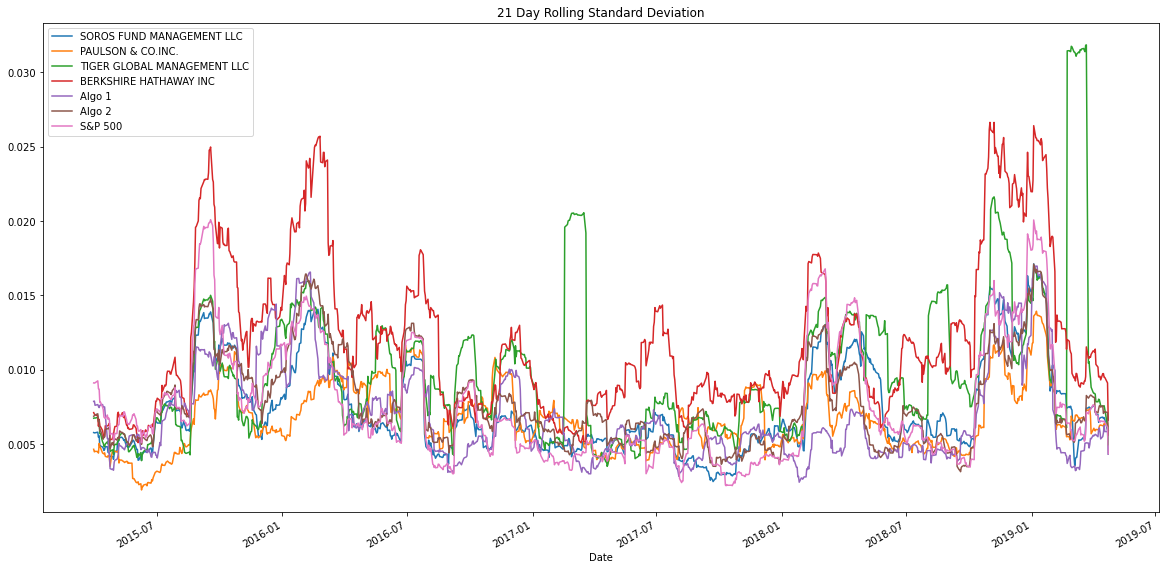

In [75]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
rolling_std_21 = combined_df.rolling(window=21).std().plot(figsize=(20,10), title="21 Day Rolling Standard Deviation")

## Correlation to General Market Risk

In addition to calculating risk for a single point in time it is helpful to measure risk as it moves through time and fluctuates upwards or downwards. In order to do this we can use rolling, or moving, statistics which will create a series of standard deviations for different subsets of the full data set. In this case, we will be using a 21 day look back window to quantify the change in risk. After plotting the rolling standard deviations for each of the portfolios, we can see that most do see an increase in their own risk as the market's risk increase, although this correlation is not perfect. For example, Berkshire Hathaway routinely has a higher standard deviation than the market during general times of increased volatility while most of the rest of the portfolios enjoy a less pronounced upswing in dispersion. Additionally, Tiger Global Management LLC's risk appears to have little correlation to the market. In times of low volatility for the market and other portfolios, Tiger Global Management periodically suffers from large increases to its own risk. 

In [76]:
# Construct a correlation table
# YOUR CODE HERE
correlation = combined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


## Correlation Table

While the above visualization is helpful, it might be more useful to quantify the correlation between the different portfolios and the general stock market (S&P 500). After creating a correlation table using Python, we can see that Algo 2 most closely mimics the S&P with a relatively high coefficient of correlation (a 0.858764 coefficient with 1.0 being perfectly correlated) in comparison to the other portfolios.

In [77]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
# Finding Beta for Soros Fund Management LLC compared to the S&P 500
covariance = combined_df["BERKSHIRE HATHAWAY INC"].cov(combined_df["S&P 500"])
variance = combined_df["BERKSHIRE HATHAWAY INC"].var()
berkshire_beta = covariance / variance
berkshire_beta

0.4975013478956255

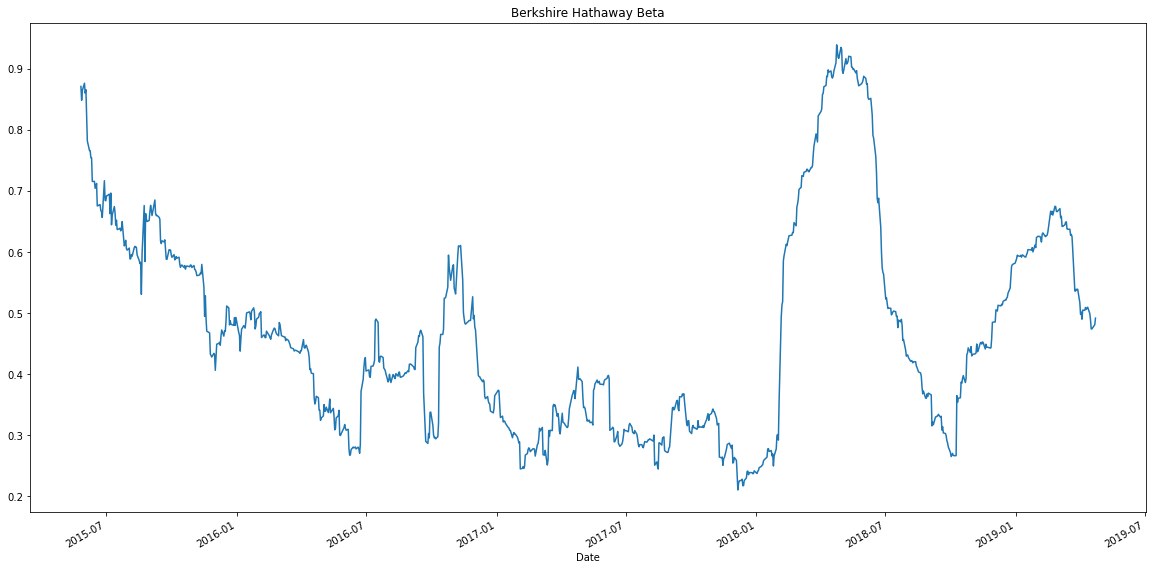

In [78]:
# Plot the 21 day rolling covariance between the Soros fund and the S&P 500
rolling_covariance = combined_df["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(combined_df["S&P 500"])
rolling_variance = combined_df["BERKSHIRE HATHAWAY INC"].rolling(window=60).var()
rolling_beta = rolling_covariance/rolling_variance
rolling_beta.plot(figsize = (20,10),title="Berkshire Hathaway Beta")

## Berkshire Hathaway Beta

Beta is a useful way to measure the riskiness of a stock or an investment by comparing it to the broader market. By definition, the market (i.e. the S&P 500) is 1.0 and a beta above that threshold is more volatile than the market but offers greater potential returns. A beta below 1.0 indicates an investment that is less risky than the overall market but offers potentially lower returns. As we can see from the graphical representation above, Berkshire Hathaway has, *generally*, a lower beta than the market meaning that it is a stable investment. 

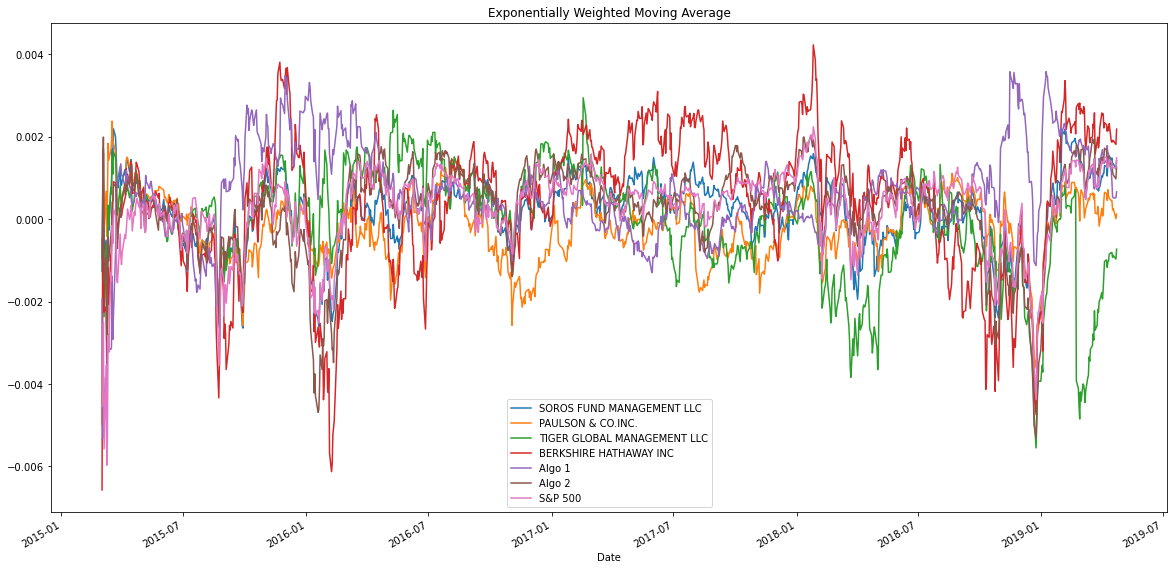

In [79]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
exponential = combined_df.ewm(halflife = 21).mean().plot(figsize=(20,10),title="Exponentially Weighted Moving Average")

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [80]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (combined_df.mean()*252)/(combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

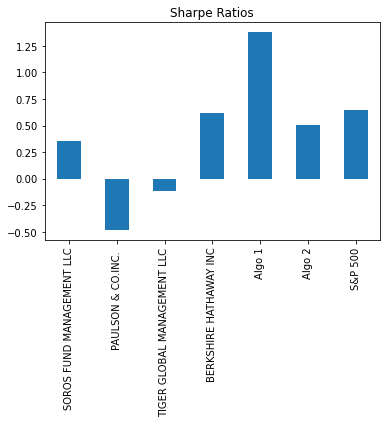

In [81]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar",title="Sharpe Ratios")


## Sharpe Ratios

The sharpe ratio is a useful piece of information for investors as it is used to convey the return of an investment compared to its risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility, which would be a measure of the price fluctuations of the portfolios in question. 

After calculating the sharpe ratios for each of the portfolios and plotting them next to each other, we can see that the Algo 1 portfolio was the top performer and even beat out the S&P 500. While Algo 2 was outpaced by Berkshire Hathaway and the market, it still carried a higher risk ratio in comparison to the remaining portfolios. 

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [82]:
# Read the first stock
# YOUR CODE HERE
google_csv = Path('Google_close.csv')
google_df = pd.read_csv(google_csv)
google_df['Date'] = google_df['Date'].str.replace('16:00:00','')
google_df.set_index(pd.to_datetime(google_df['Date'], infer_datetime_format=True), inplace=True)
google_df.drop(columns=['Date'], inplace=True)
google_df = google_df.sort_index()
google_df.rename(columns={"Close":"GOOG"},inplace=True)
google_df.head()

,GOOG
Date,
2014-01-02,556.55
2014-01-03,552.50
2014-01-06,558.66
2014-01-07,569.42
2014-01-08,570.61


In [83]:
# Read the second stock
# YOUR CODE HERE
twitter_csv = Path('Twitter_close.csv')
twitter_df = pd.read_csv(twitter_csv)
twitter_df['Date'] = twitter_df['Date'].str.replace('16:00:00','')
twitter_df.set_index(pd.to_datetime(twitter_df['Date'], infer_datetime_format=True), inplace=True)
twitter_df.drop(columns=['Date'], inplace=True)
twitter_df = twitter_df.sort_index()
twitter_df.rename(columns={"Close":"TWTR"},inplace=True)
twitter_df.head()

,TWTR
Date,
2014-01-02,67.50
2014-01-03,69.00
2014-01-06,66.29
2014-01-07,61.46
2014-01-08,59.29


In [84]:
# Read the third stock
# YOUR CODE HERE
JPM_csv = Path('JPM_close.csv')
JPM_df = pd.read_csv(JPM_csv)
JPM_df['Date'] = JPM_df['Date'].str.replace('16:00:00','')
JPM_df.set_index(pd.to_datetime(JPM_df['Date'], infer_datetime_format=True), inplace=True)
JPM_df.drop(columns=['Date'], inplace=True)
JPM_df.rename(columns={"Close":"JPM"},inplace=True)
JPM_df.head()

,JPM
Date,
2014-01-02,58.21
2014-01-03,58.66
2014-01-06,59.00
2014-01-07,58.32
2014-01-08,58.87


In [85]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

In [86]:
# Reset the index
# YOUR CODE HERE

In [87]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
combined_df1 = pd.concat([google_df,twitter_df,JPM_df],axis="columns",join="inner")
combined_df1.head()

,GOOG,TWTR,JPM
Date,,,
2014-01-02,556.55,67.50,58.21
2014-01-03,552.50,69.00,58.66
2014-01-06,558.66,66.29,59.00
2014-01-07,569.42,61.46,58.32
2014-01-08,570.61,59.29,58.87


In [88]:
# Drop Nulls
# YOUR CODE HERE

# Identify nulls
combined_df1.isnull().sum()

# No nulls identified and therefore no need to drop nulls from the dataframe

GOOG    0
TWTR    0
JPM     0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [89]:
# Calculate weighted portfolio returns
daily_returns = combined_df1.pct_change()
daily_returns.head()

,GOOG,TWTR,JPM
Date,,,
2014-01-02,NaN,NaN,NaN
2014-01-03,-0.007277,0.022222,0.007731
2014-01-06,0.011149,-0.039275,0.005796
2014-01-07,0.019260,-0.072862,-0.011525
2014-01-08,0.002090,-0.035308,0.009431


In [90]:
# YOUR CODE HERE
weights = [1/3, 1/3, 1/3]
portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()

Date
2014-01-02         NaN
2014-01-03    0.007559
2014-01-06   -0.007443
2014-01-07   -0.021709
2014-01-08   -0.007929
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [91]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
combined_df['Custom'] = portfolio_returns
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.000627
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.000275
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,-0.001096
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.014624
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.010012


In [92]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
combined_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
Custom                         4
dtype: int64

In [93]:
# Drop nulls
combined_df.dropna(inplace=True)
combined_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
Custom                         0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

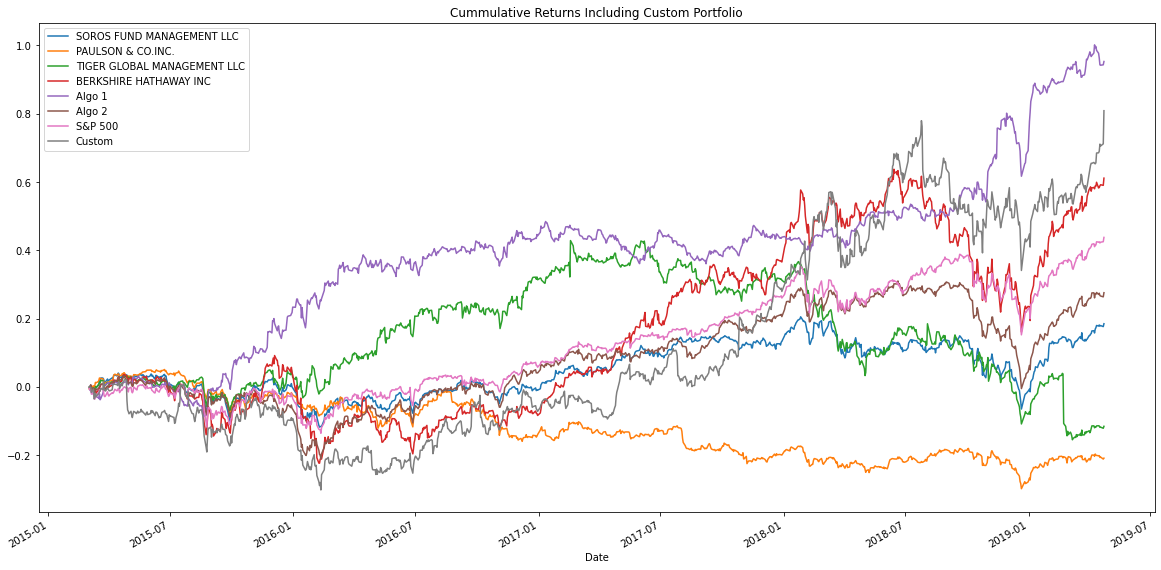

In [94]:
# Performance
cumulative_returns_1 = (1 + combined_df).cumprod() - 1
cumulative_returns_1.plot(figsize = (20,10),title="Cummulative Returns Including Custom Portfolio")

In [95]:
# Risk
# YOUR CODE HERE
volatility_1 = combined_df.std()
volatility_1

SOROS FUND MANAGEMENT LLC      0.007888
PAULSON & CO.INC.              0.007027
TIGER GLOBAL MANAGEMENT LLC    0.010877
BERKSHIRE HATHAWAY INC         0.012922
Algo 1                         0.007631
Algo 2                         0.008343
S&P 500                        0.008523
Custom                         0.015299
dtype: float64

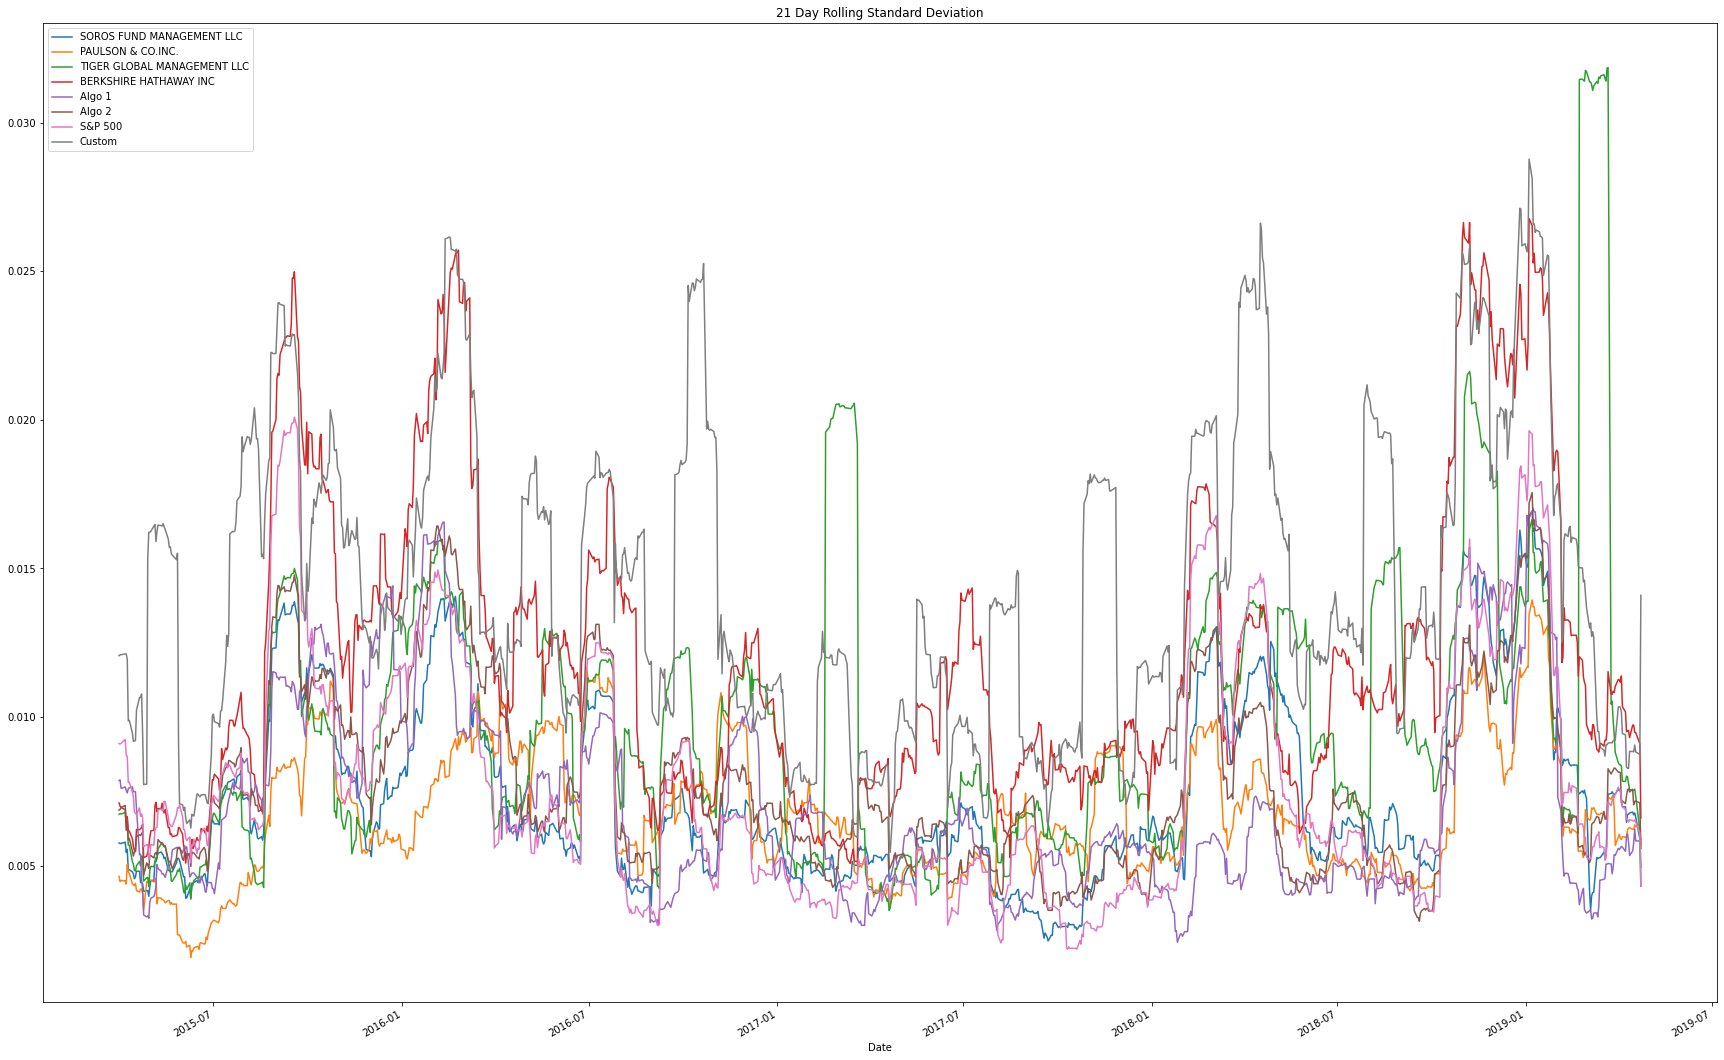

In [96]:
# Rolling
# YOUR CODE HERE
rolling_std_21_1 = combined_df.rolling(window=21).std().plot(figsize=(30,20), title="21 Day Rolling Standard Deviation")

In [97]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
volatility_annualized_1 = combined_df.std()*np.sqrt(252)
volatility_annualized_1

SOROS FUND MANAGEMENT LLC      0.125212
PAULSON & CO.INC.              0.111554
TIGER GLOBAL MANAGEMENT LLC    0.172663
BERKSHIRE HATHAWAY INC         0.205124
Algo 1                         0.121145
Algo 2                         0.132445
S&P 500                        0.135301
Custom                         0.242861
dtype: float64

In [98]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios_1 = (combined_df.mean()*252)/(combined_df.std() * np.sqrt(252))
sharpe_ratios_1

SOROS FUND MANAGEMENT LLC      0.391166
PAULSON & CO.INC.             -0.453880
TIGER GLOBAL MANAGEMENT LLC   -0.085225
BERKSHIRE HATHAWAY INC         0.667043
Algo 1                         1.400810
Algo 2                         0.512276
S&P 500                        0.718630
Custom                         0.713602
dtype: float64

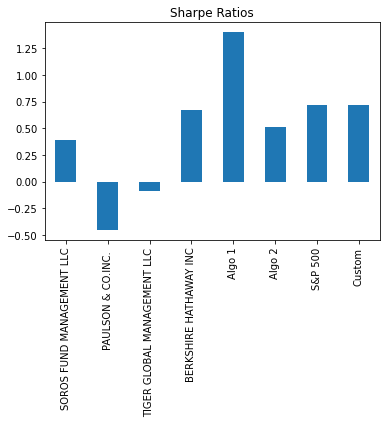

In [99]:
# Plot in order to visualize the sharpe ratios
sharpe_ratios_1.plot(kind="bar",title="Sharpe Ratios")

In [100]:
# Create a correlation analysis
# YOUR CODE HERE
correlation_1 = combined_df.corr()
correlation_1

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.699028,0.558532,0.754242,0.321003,0.826491,0.837534,0.609607
PAULSON & CO.INC.,0.699028,1.000000,0.432407,0.544554,0.268295,0.677555,0.669012,0.457924
TIGER GLOBAL MANAGEMENT LLC,0.558532,0.432407,1.000000,0.422630,0.163450,0.505259,0.621411,0.368108
BERKSHIRE HATHAWAY INC,0.754242,0.544554,0.422630,1.000000,0.291120,0.688134,0.750859,0.624114
Algo 1,0.321003,0.268295,0.163450,0.291120,1.000000,0.288029,0.278691,0.218506
Algo 2,0.826491,0.677555,0.505259,0.688134,0.288029,1.000000,0.859848,0.632993
S&P 500,0.837534,0.669012,0.621411,0.750859,0.278691,0.859848,1.000000,0.678169
Custom,0.609607,0.457924,0.368108,0.624114,0.218506,0.632993,0.678169,1.000000


In [101]:
# Calculate the beta for the customer portfolio
covariance_1 = combined_df["Custom"].cov(combined_df["S&P 500"])
variance_1 = combined_df["Custom"].var()
custom_beta = covariance_1 / variance_1
custom_beta

0.377816907640365

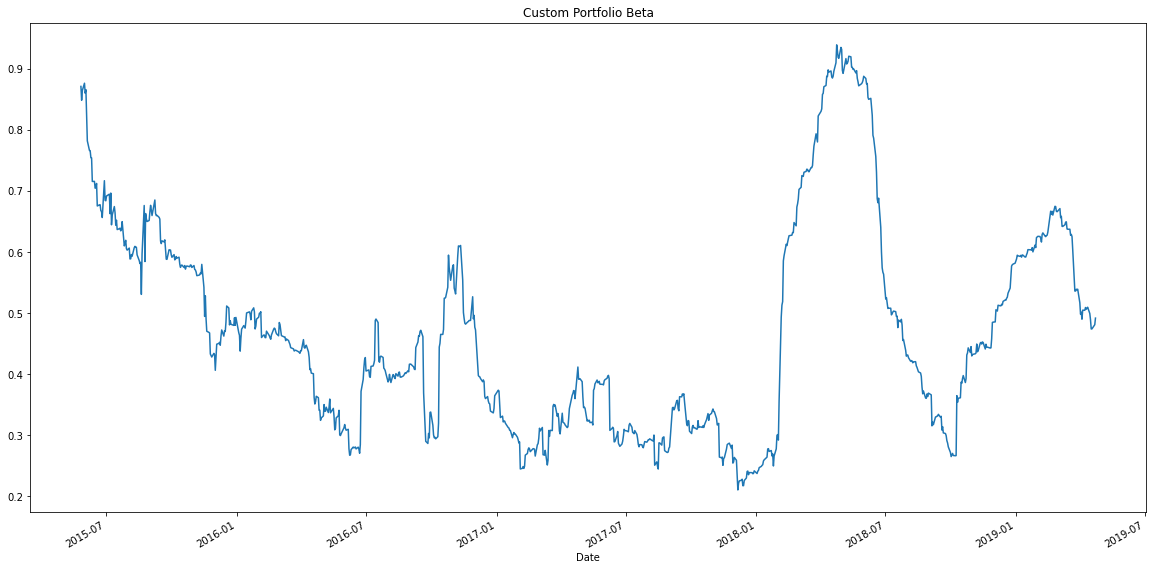

In [102]:
# Plot custom beta
rolling_covariance_1 = combined_df["Custom"].rolling(window=60).cov(combined_df["S&P 500"])
rolling_variance_1 = combined_df["Custom"].rolling(window=60).var()
rolling_beta_1 = rolling_covariance_1/rolling_variance_1
rolling_beta.plot(figsize = (20,10),title="Custom Portfolio Beta")

## Custom Portfolio

After constructing a custom portfolio made up of Google, Twitter and JP Morgan stock, I conducted a similar analysis of those made above. In terms of cumulative returns, this custom portfolio performed very well, outpacing the market and each portfolio except for Algo 1. However, this custom portfolio did have a higher standard deviation as compared to the S&P 500 and experienced higher bouts of volatility during times of uncertainly, similar to Berkshire Hathaway.

While this is concerning, it is also noteworthy to point out that the custom portfolio had a very similar sharpe ratio to that of the S&P 500 (0.713602 vs 0.718630) and enjoyed a higher sharpe ratio compared to every portfolio except for Algo 1 and had a beta below 1.0 indicating that it is a relatively stable investment strategy. 